## Professional Performance Analysis Premier League 2024/25

In [1]:
# Notebook for Tactical and Recruitment Decision Support
#bib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import zscore
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Config
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
df = pd.read_csv("epl_player_stats_24_25.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player Name                562 non-null    object 
 1   Club                       562 non-null    object 
 2   Nationality                562 non-null    object 
 3   Position                   562 non-null    object 
 4   Appearances                562 non-null    int64  
 5   Minutes                    562 non-null    int64  
 6   Goals                      562 non-null    int64  
 7   Assists                    562 non-null    int64  
 8   Shots                      562 non-null    int64  
 9   Shots On Target            562 non-null    int64  
 10  Conversion %               562 non-null    object 
 11  Big Chances Missed         562 non-null    int64  
 12  Hit Woodwork               562 non-null    int64  
 13  Offsides                   562 non-null    int64  

### DATA CLEANING AND PREPARATION

In [4]:
df["Club"].unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Brighton & Hove Albion', 'Chelsea', 'Crystal Palace', 'Everton',
       'Fulham', 'Ipswich Town', 'Leicester City', 'Liverpool',
       'Manchester City', 'Manchester United', 'Newcastle United',
       'Nottingham Forest', 'Southampton', 'Tottenham Hotspur',
       'West Ham United', 'Wolverhampton Wanderers'], dtype=object)

In [5]:
df[df["Club"] == "Brighton"]

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
109,Jakub Moder,Brighton,Poland,MID,4,9,0,0,0,0,...,0,0,0,0,0%,0,0,0,0,0.0
110,James Milner,Brighton,England,MID,4,173,0,0,2,0,...,3,1,0,0,0%,0,0,0,0,0.0


In [6]:
df.loc[df["Club"] == "Brighton", "Club"] = "Brighton & Hove Albion"

In [7]:
def data_quality_assessment(df):
    """
    Data Quality Assessment
    """
    print("\n🔍 DATA QUALITY ASSESSMENT")
    print("-" * 50)
    
    # Compute missing values
    missing_data = pd.DataFrame({
        'Column': df.columns,
        'Missing_Values': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
    }).sort_values('Missing_Percentage', ascending=False)
    
    print(missing_data)
    
    # Visualization of missing values
    plt.figure(figsize=(15, 8))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('🔍 Missing Values Map by Variable', fontsize=16, fontweight='bold')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    return missing_data 


🔍 DATA QUALITY ASSESSMENT
--------------------------------------------------
                                              Column  Missing_Values  \
Player Name                              Player Name               0   
Carries Ended with Shot      Carries Ended with Shot               0   
Possession Won                        Possession Won               0   
Dispossessed                            Dispossessed               0   
Clean Sheets                            Clean Sheets               0   
Clearances                                Clearances               0   
Interceptions                          Interceptions               0   
Blocks                                        Blocks               0   
Tackles                                      Tackles               0   
Ground Duels                            Ground Duels               0   
gDuels Won                                gDuels Won               0   
gDuels %                                    gDuels %      

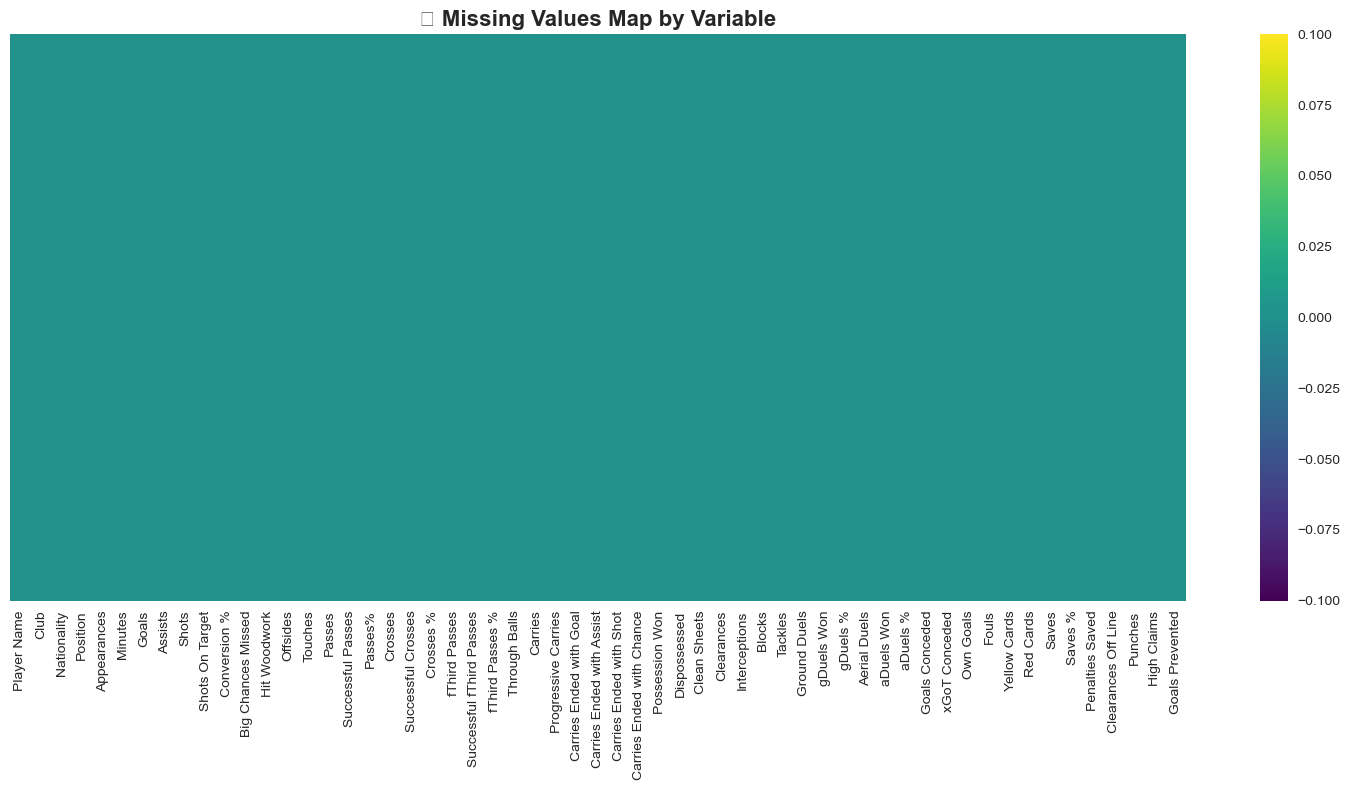

,Column,Missing_Values,Missing_Percentage
Player Name,Player Name,0,0.0
Carries Ended with Shot,Carries Ended with Shot,0,0.0
Possession Won,Possession Won,0,0.0
Dispossessed,Dispossessed,0,0.0
Clean Sheets,Clean Sheets,0,0.0
Clearances,Clearances,0,0.0
Interceptions,Interceptions,0,0.0
Blocks,Blocks,0,0.0
Tackles,Tackles,0,0.0
Ground Duels,Ground Duels,0,0.0


In [8]:
data_quality_assessment(df)


In [9]:
def clean_percentage_columns(df):
    """Cleans percentage columns and converts them to float"""
    percentage_cols = ['Conversion %', 'Passes%', 'Crosses %', 'fThird Passes %', 
                      'gDuels %', 'aDuels %', 'Saves %']
    
    for col in percentage_cols:
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace('%', '').str.replace('--', '0')
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    
    return df

In [10]:
df = clean_percentage_columns(df)

In [11]:
def create_performance_metrics(df):
    """Creates advanced performance metrics"""
    # Offensive efficiency metrics

    # Avoid division by zero and handle missing columns gracefully
    df = df.copy()

    # Set to 0 if Minutes is zero or missing for any per 90 calculation
    df['Goals_per_90'] = np.where(df['Minutes'] > 0, (df['Goals'] / df['Minutes']) * 90, 0)
    df['Assists_per_90'] = np.where(df['Minutes'] > 0, (df['Assists'] / df['Minutes']) * 90, 0)
    df['G+A_per_90'] = df['Goals_per_90'] + df['Assists_per_90']
    df['Shot_Accuracy'] = np.where(df['Shots'] > 0, 
                                   (df['Shots On Target'] / df['Shots']) * 100, 0)
    
    # Playmaking metrics
    df['Key_Passes_per_90'] = np.where(df['Minutes'] > 0, (df['Through Balls'] / df['Minutes']) * 90, 0)
    df['Progressive_Actions'] = df['Progressive Carries'] + df['Successful fThird Passes']
    df['Progressive_per_90'] = np.where(df['Minutes'] > 0, (df['Progressive_Actions'] / df['Minutes']) * 90, 0)

    # Defensive metrics
    df['Defensive_Actions'] = df['Tackles'] + df['Interceptions'] + df['Clearances']
    df['Defensive_per_90'] = np.where(df['Minutes'] > 0, (df['Defensive_Actions'] / df['Minutes']) * 90, 0)
    df['Duel_Success_Rate'] = np.where(
        (df['Ground Duels'] + df['Aerial Duels']) > 0,
        ((df['gDuels Won'] + df['aDuels Won']) / (df['Ground Duels'] + df['Aerial Duels'])) * 100,
        0
    )

    # Goalkeeper metrics
    df['Clean_Sheet_Rate'] = np.where(
        df['Appearances'] > 0,
        (df['Clean Sheets'] / df['Appearances']) * 100,
        0
    )

    return df

In [12]:
df = create_performance_metrics(df)

### ANALYSIS BY POSITION

In [13]:
def analyze_by_position(df):
    """Analyzes average performance by position"""
    position_stats = df.groupby('Position').agg({
        'Goals_per_90': 'mean',
        'Assists_per_90': 'mean',
        'G+A_per_90': 'mean',
        'Shot_Accuracy': 'mean',
        'Passes%': 'mean',
        'Defensive_per_90': 'mean',
        'Duel_Success_Rate': 'mean',
        'Minutes': 'mean'
    }).round(2)
    
    return position_stats

In [14]:
analyze_by_position(df)

,Goals_per_90,Assists_per_90,G+A_per_90,Shot_Accuracy,Passes%,Defensive_per_90,Duel_Success_Rate,Minutes
Position,,,,,,,,
DEF,0.04,0.03,0.07,67.15,48.14,7.17,29.24,1378.65
FWD,0.25,0.06,0.30,10.27,35.07,4.41,20.76,968.70
GKP,0.00,0.00,0.00,1.53,2.02,1.55,0.95,1544.04
MID,0.13,0.10,0.22,30.62,51.22,4.80,31.37,1395.95


In [15]:
def create_tactical_dashboard(df):
    
    # 1. Heatmap of performance by position
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    
    # Correlation matrix of offensive metrics
    offensive_metrics = ['Goals_per_90', 'Assists_per_90', 'Shot_Accuracy', 
                        'Conversion %', 'Progressive_per_90']
    corr_matrix = df[offensive_metrics].corr()
    
    sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0,
                ax=axes[0,0], cbar_kws={'label': 'Correlation'})
    axes[0,0].set_title('Offensive Metrics Correlation', fontsize=14, fontweight='bold')
    
    # Distribution of goals per position
    position_goals = df.groupby('Position')['Goals_per_90'].mean().sort_values(ascending=True)
    position_goals.plot(kind='barh', ax=axes[0,1], color='skyblue')
    axes[0,1].set_title('Goals per 90 Minutes by Position', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Goals per 90 Minutes')
    
    # Radar chart for top performers (to be implemented)
    top_players = df.nlargest(10, 'G+A_per_90')
    
    # Defensive efficiency by position
    defensive_by_pos = df.groupby('Position')['Defensive_per_90'].mean().sort_values(ascending=True)
    defensive_by_pos.plot(kind='barh', ax=axes[1,0], color='lightcoral')
    axes[1,0].set_title('Defensive Actions per 90 Minutes', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Defensive Actions per 90 Minutes')
    
    # Pass accuracy by position
    pass_accuracy = df.groupby('Position')['Passes%'].mean().sort_values(ascending=True)
    pass_accuracy.plot(kind='barh', ax=axes[1,1], color='lightgreen')
    axes[1,1].set_title('Pass Accuracy by Position', fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Pass Success Percentage')
    
    plt.tight_layout()
    plt.show()

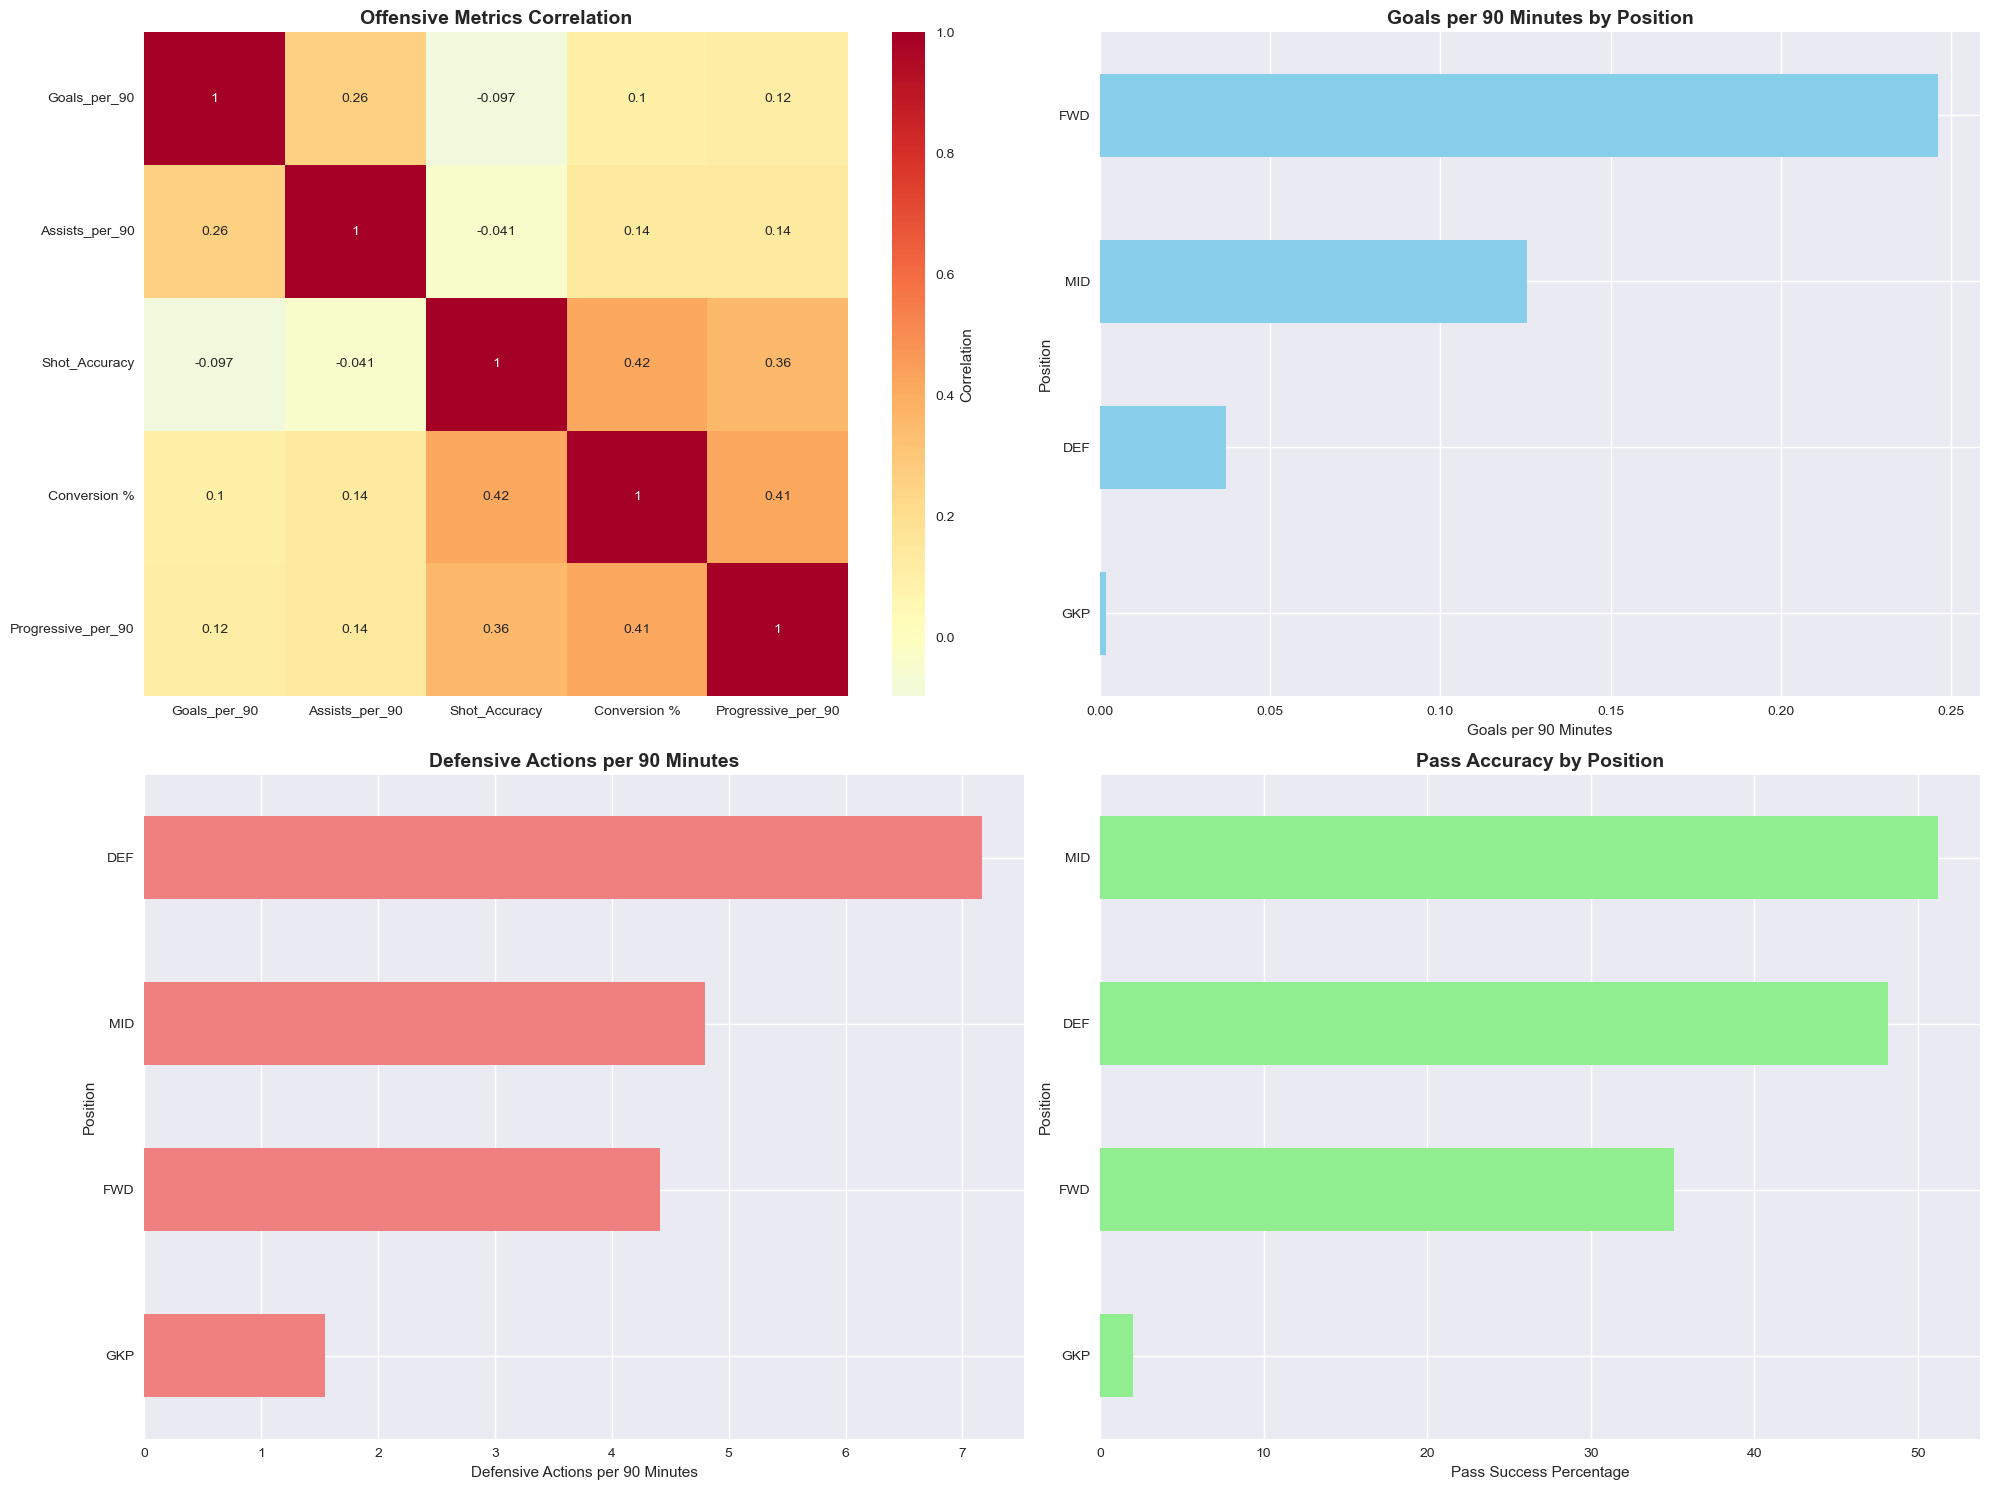

In [16]:
create_tactical_dashboard(df)

In [17]:
def create_player_comparison_radar_per90(df, player_names):
    """Creates a radar chart to compare players (per 90 minutes metrics)"""
    metrics = ['Goals_per_90', 'Assists_per_90', 'Defensive_per_90']
    fig = go.Figure()
    
    for player in player_names:
        player_data = df[df['Player Name'] == player]
        if not player_data.empty:
            values = []
            for metric in metrics:
                # Normalization relative to the league maximum
                max_val = df[metric].max()
                normalized_val = (player_data[metric].iloc[0] / max_val) * 100 if max_val > 0 else 0
                values.append(normalized_val)
            
            fig.add_trace(go.Scatterpolar(
                r=values,
                theta=metrics,
                fill='toself',
                name=player,
                line=dict(width=2)
            ))
    
    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True, range=[0, 100])
        ),
        title="Multi-Dimensional Player Comparison",
        showlegend=True,
        width=800,
        height=600
    )
    
    return fig

In [18]:
players_to_compare = ['Omar Marmoush', 'Mohamed Salah', 'Alexander Isak']
radar_fig = create_player_comparison_radar_per90(df, players_to_compare)
radar_fig.show()

In [19]:
def create_player_comparison_radar(df, player_names):
    """Creates a radar chart to compare players"""
    
    metrics = ['Shot_Accuracy','Passes%','Duel_Success_Rate']
    
    fig = go.Figure()
    
    for player in player_names:
        player_data = df[df['Player Name'] == player]
        if not player_data.empty:
            values = []
            for metric in metrics:
                # Normalisation par rapport au maximum de la ligue
                max_val = df[metric].max()
                normalized_val = (player_data[metric].iloc[0] / max_val) * 100 if max_val > 0 else 0
                values.append(normalized_val)
            
            fig.add_trace(go.Scatterpolar(
                r=values,
                theta=metrics,
                fill='toself',
                name=player,
                line=dict(width=2)
            ))
    
    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True, range=[0, 100])
        ),
        title="🏆 Comparaison Multi-Dimensionnelle des Joueurs",
        showlegend=True,
        width=800,
        height=600
    )
    
    return fig

In [20]:
players_to_compare = ['Omar Marmoush', 'Mohamed Salah', 'Alexander Isak']
radar_fig = create_player_comparison_radar(df, players_to_compare)
radar_fig.show()

In [21]:
def create_team_performance_analysis(df):
    """Analyzes team performance"""
    
    team_stats = df.groupby('Club').agg({
        'Goals': 'sum',
        'Assists': 'sum',
        'Goals_per_90': 'mean',
        'Assists_per_90': 'mean',
        'Passes%': 'mean',
        'Defensive_per_90': 'mean',
        'Minutes': 'sum'
    }).round(2)
    
    # Calculate total offensive efficiency
    team_stats['Total_G+A'] = team_stats['Goals'] + team_stats['Assists']
    team_stats = team_stats.sort_values('Total_G+A', ascending=False)
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    
    # Top 10 teams by goals + assists
    top_teams = team_stats.head(10)
    
    # Bar chart of G+A by team
    top_teams['Total_G+A'].plot(kind='bar', ax=axes[0,0], color='gold')
    axes[0,0].set_title('Top 10 Teams - Goals + Assists', fontsize=14, fontweight='bold')
    axes[0,0].set_ylabel('Total G+A')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Pass accuracy by team
    team_stats['Passes%'].head(10).plot(kind='bar', ax=axes[0,1], color='lightblue')
    axes[0,1].set_title('Pass Accuracy by Team', fontsize=14, fontweight='bold')
    axes[0,1].set_ylabel('Pass Success Percentage')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Scatter plot: Offense vs Defense
    axes[1,0].scatter(team_stats['Goals_per_90'], team_stats['Defensive_per_90'], 
                     s=100, alpha=0.7, c='red')
    axes[1,0].set_xlabel('Goals per 90min (team average)')
    axes[1,0].set_ylabel('Defensive actions per 90min')
    axes[1,0].set_title('Team Offensive-Defensive Balance', fontsize=14, fontweight='bold')
    
    # Total playing time by team
    team_stats['Minutes'].plot(kind='bar', ax=axes[1,1], color='purple')
    axes[1,1].set_title('Total Playing Time by Team', fontsize=14, fontweight='bold')
    axes[1,1].set_ylabel('Total Minutes')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return team_stats 

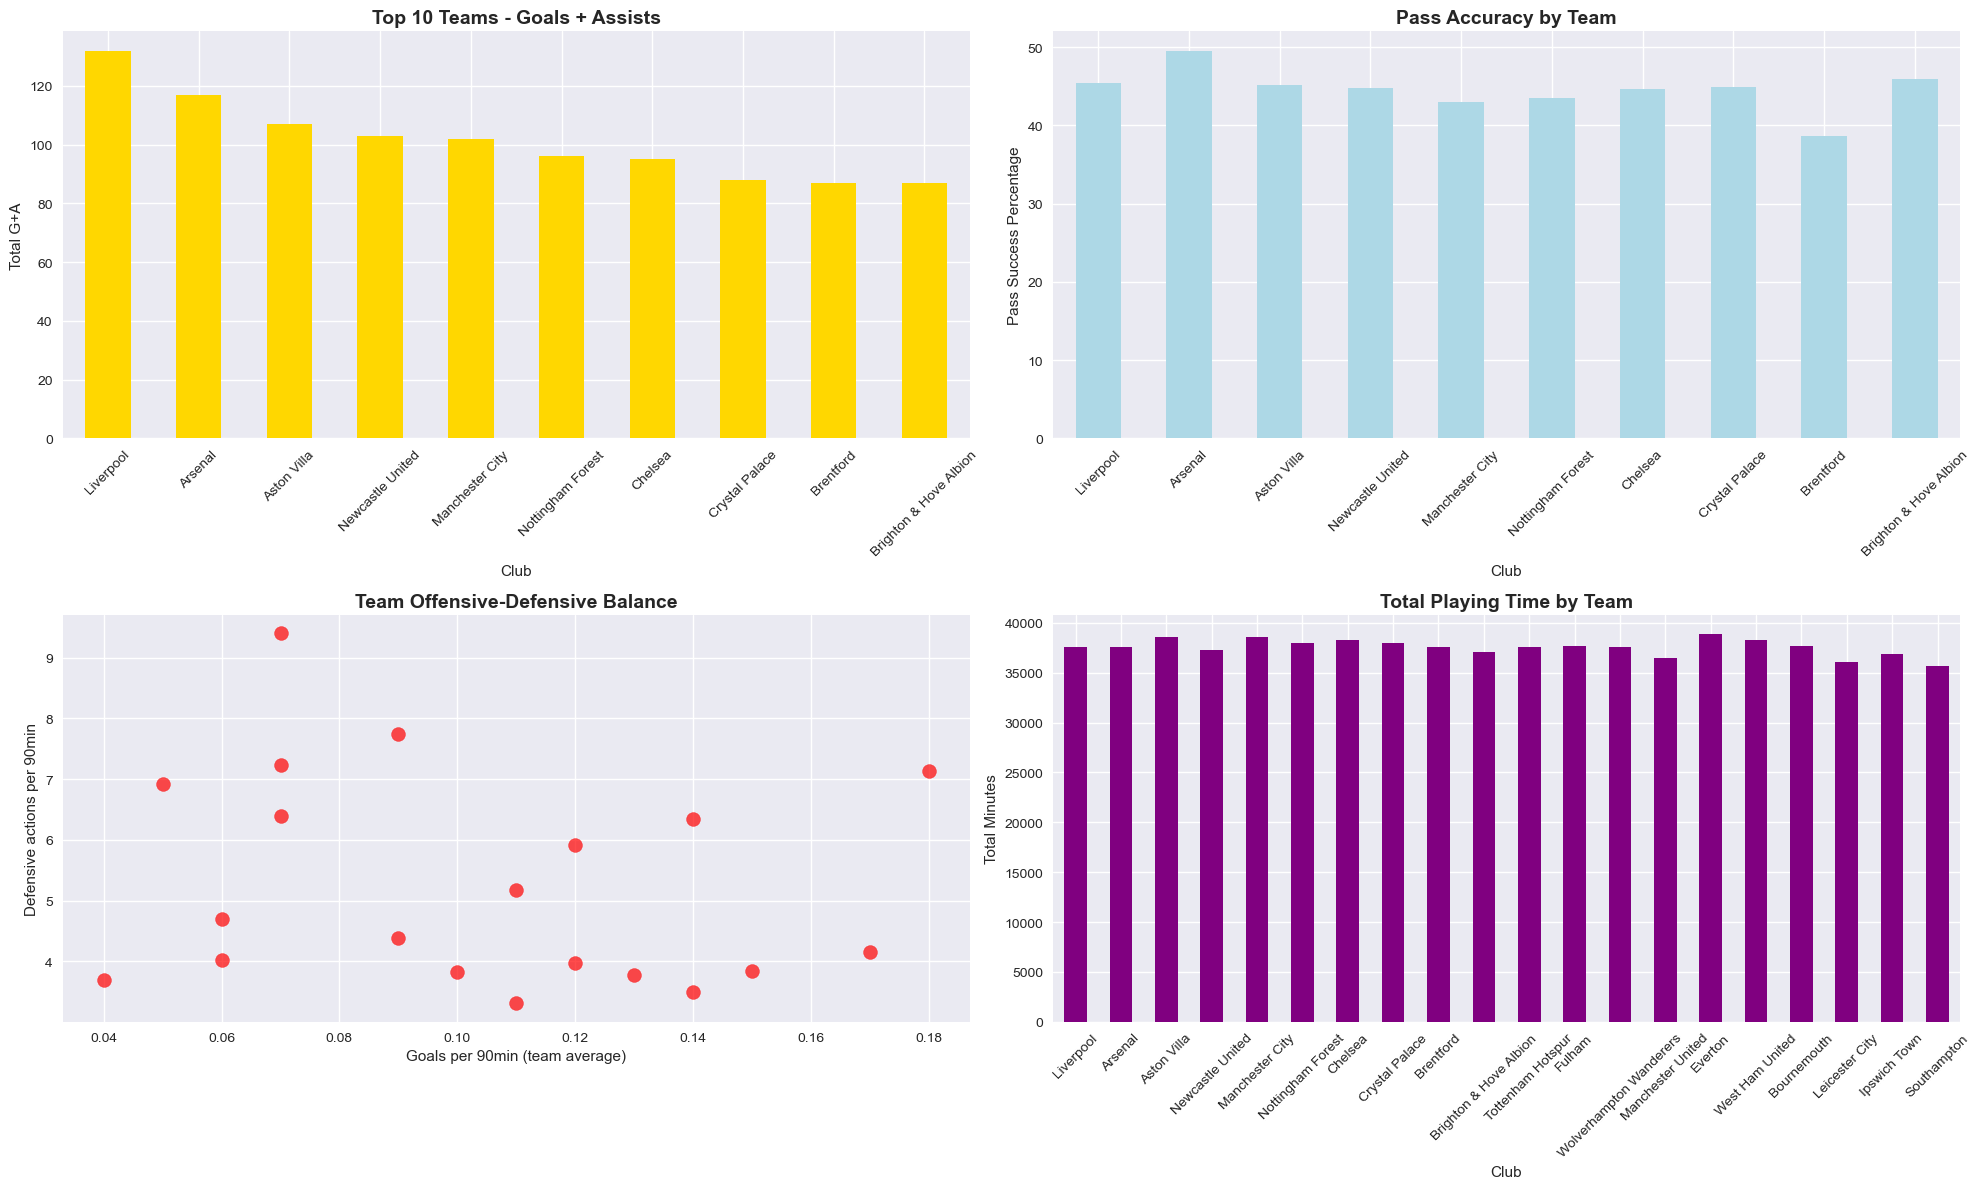

,Goals,Assists,Goals_per_90,Assists_per_90,Passes%,Defensive_per_90,Minutes,Total_G+A
Club,,,,,,,,
Liverpool,72,60,0.13,0.12,45.46,3.78,37525,132
Arsenal,67,50,0.15,0.10,49.56,3.84,37573,117
Aston Villa,61,46,0.17,0.08,45.19,4.16,38529,107
Newcastle United,66,37,0.14,0.07,44.74,3.49,37257,103
Manchester City,71,31,0.14,0.05,42.94,6.35,38524,102
Nottingham Forest,57,39,0.11,0.06,43.57,5.18,37975,96
Chelsea,63,32,0.11,0.06,44.64,3.31,38263,95
Crystal Palace,51,37,0.18,0.08,44.92,7.14,37923,88
Brentford,54,33,0.07,0.05,38.68,6.39,37571,87


In [22]:
create_team_performance_analysis(df)

### SPECIALIZED ANALYSIS

In [23]:
def identify_tactical_profiles(df, n_clusters=3):
    """
    Identifies tactical player profiles using KMeans clustering.
    Returns a dictionary of profiles with player DataFrames.
    """
    # Features for clustering (adapt as needed)
    features = [
        'Goals_per_90', 'Conversion %', 'Assists_per_90', 'Progressive_per_90',
        'Defensive_per_90', 'Duel_Success_Rate', 'G+A_per_90', 'Passes%'
    ]
    # Keep only players with all features (no NA)
    df_clust = df.dropna(subset=features).copy()
    X = df_clust[features].values

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Run KMeans
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    df_clust['Profile'] = kmeans.fit_predict(X_scaled)

    # Assign profile names based on cluster centers (manual interpretation)
    centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
    profile_names = {}
    # Example logic: you may inspect/print centers and adjust these assignments
    # Here we assign based on max mean per cluster
    centers['sum'] = centers.sum(axis=1)
    ranked = centers.sort_values('sum', ascending=False).index.tolist()
    # Assign highest sum as Versatile, next as Clinical Strikers, etc. (customize as needed)
    mapping = {}
    mapping[ranked[0]] = 'Versatile Players'
    mapping[ranked[1]] = 'Clinical Strikers'
    mapping[ranked[2]] = 'Solid Defenders'

    df_clust['Profile Name'] = df_clust['Profile'].map(mapping)

    # Extract DataFrames for each profile
    profiles = {}
    for prof in set(mapping.values()):
        profiles[prof] = df_clust[df_clust['Profile Name'] == prof][
            ['Player Name', 'Club', 'Position', 'Goals_per_90', 'Conversion %',
             'Assists_per_90', 'Progressive_per_90', 'Defensive_per_90',
             'Duel_Success_Rate', 'G+A_per_90', 'Passes%', 'Minutes']
        ]

    return profiles

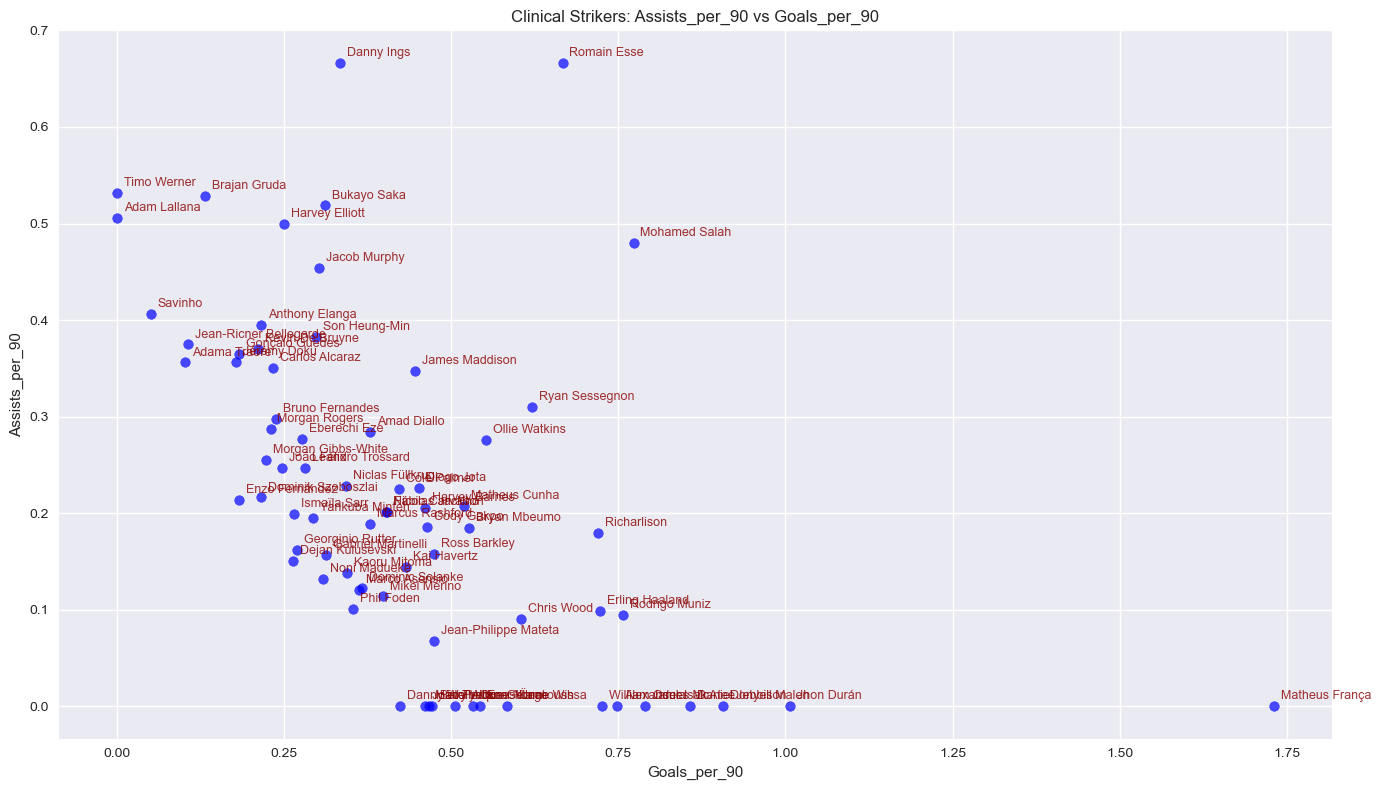

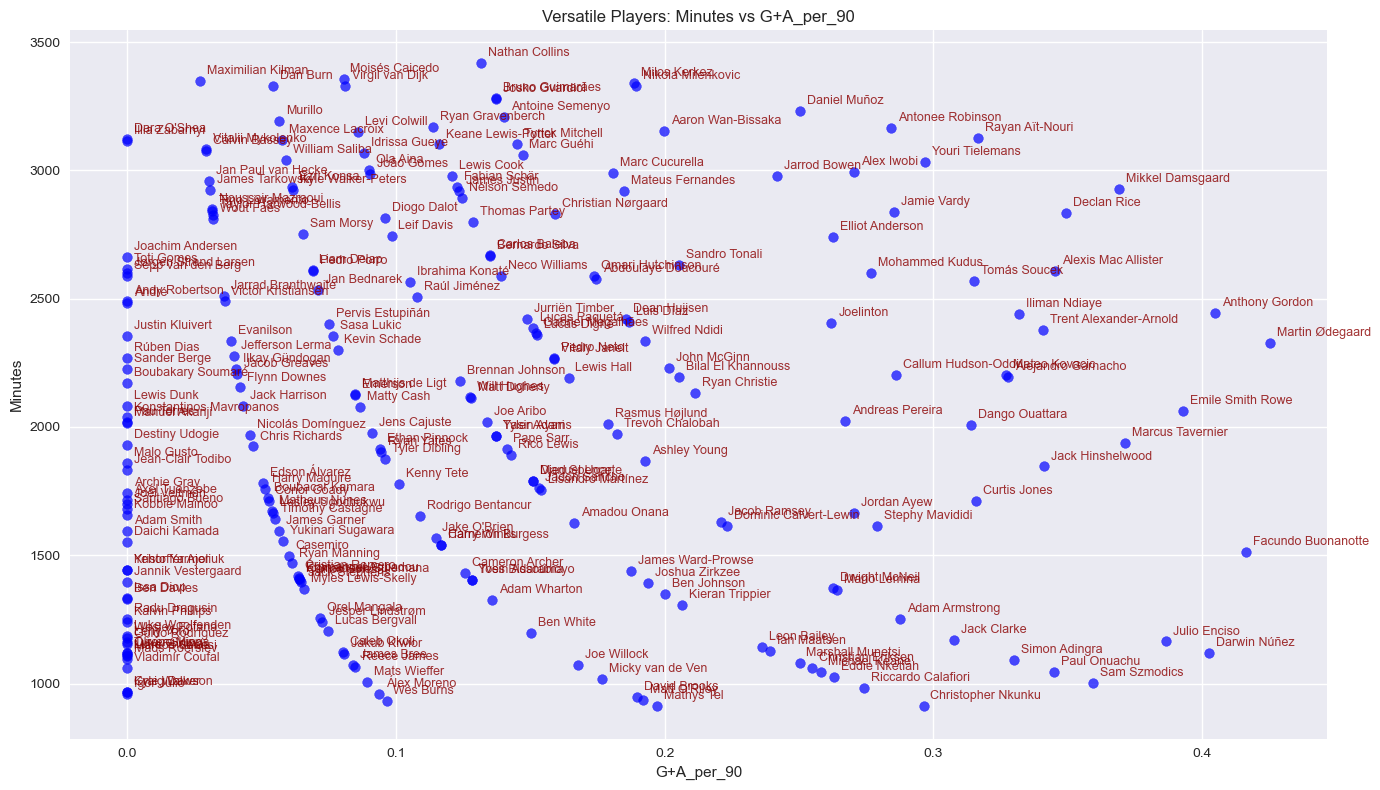

In [24]:
# You provided this mapping for each profile's most important features
PROFILE_FEATURES = {
    "Clinical Strikers": ("Goals_per_90", "Assists_per_90"),
    "Versatile Players": ("G+A_per_90", "Minutes")
}

def automated_profile_scatterplots_all(profile_dict):
    """
    For each profile in profile_dict, create a scatter plot using the most relevant feature pair.
    Annotates all players with their name.
    """
    for profile, df in profile_dict.items():
        if profile not in PROFILE_FEATURES:
            continue  # Skip if no features defined
        x_feat, y_feat = PROFILE_FEATURES[profile]
        if x_feat not in df.columns or y_feat not in df.columns:
            continue  # Skip if features missing

        plt.figure(figsize=(14, 8))
        plt.scatter(df[x_feat], df[y_feat], color='blue', alpha=0.7)
        plt.xlabel(x_feat)
        plt.ylabel(y_feat)
        plt.title(f'{profile}: {y_feat} vs {x_feat}')

        # Annotate ALL players with their names
        for _, row in df.iterrows():
            plt.annotate(
                row['Player Name'],
                (row[x_feat], row[y_feat]),
                textcoords="offset points", xytext=(5,5), ha='left', fontsize=9, color='darkred', alpha=0.8
            )
        plt.tight_layout()
        plt.show()

# Usage example:
profiles = identify_tactical_profiles(df)
automated_profile_scatterplots_all(profiles)

In [25]:
def create_recruitment_analysis(df):
    """Recruitment analysis based on value-for-money ratio"""
    # Standardize the key columns (you can add/remove according to your dataset)
    for col in ['Goals_per_90', 'Assists_per_90', 'Shot_Accuracy', 'Passes%', 'Defensive_per_90', 'Duel_Success_Rate']:
        df[f'{col}_z'] = zscore(df[col])
    # Weighted sum of standardized scores
    df['Performance_Score'] = (
    df['Goals_per_90_z'] * 3 +
    df['Assists_per_90_z'] * 2 +
    df['Shot_Accuracy_z'] * 1 +
    df['Passes%_z'] * 1 +
    df['Defensive_per_90_z'] * 1 +
    df['Duel_Success_Rate_z'] * 1)

    # Identify valued players (lots of playing time, high performance)
    undervalued = df[
        (df['Minutes'] > df['Minutes'].quantile(0.3)) &
        (df['Performance_Score'] > df['Performance_Score'].quantile(0.7)) &
        (df['Appearances'] > 10)
    ].sort_values('Performance_Score', ascending=False)
    
    # Create the plots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Scatter plot: Performance vs Playing Time
    scatter = axes[0].scatter(df['Minutes'], df['Performance_Score'], 
                             c=df['Appearances'], cmap='viridis', alpha=0.6, s=50)
    axes[0].set_xlabel('Minutes played')
    axes[0].set_ylabel('Performance Score')
    axes[0].set_title('💎 Hidden Talent Identification', fontsize=14, fontweight='bold')
    plt.colorbar(scatter, ax=axes[0], label='Number of Appearances')
    
    # Top valued players
    top_undervalued = undervalued.head(15)
    axes[1].barh(range(len(top_undervalued)), top_undervalued['Performance_Score'])
    axes[1].set_yticks(range(len(top_undervalued)))
    axes[1].set_yticklabels(top_undervalued['Player Name'])
    axes[1].set_xlabel('Performance Score')
    axes[1].set_title('🎯 Top 15 valued Players', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return undervalued[['Player Name', 'Club', 'Position', 'Performance_Score', 
                        'Minutes', 'G+A_per_90', 'Passes%']].head(20)

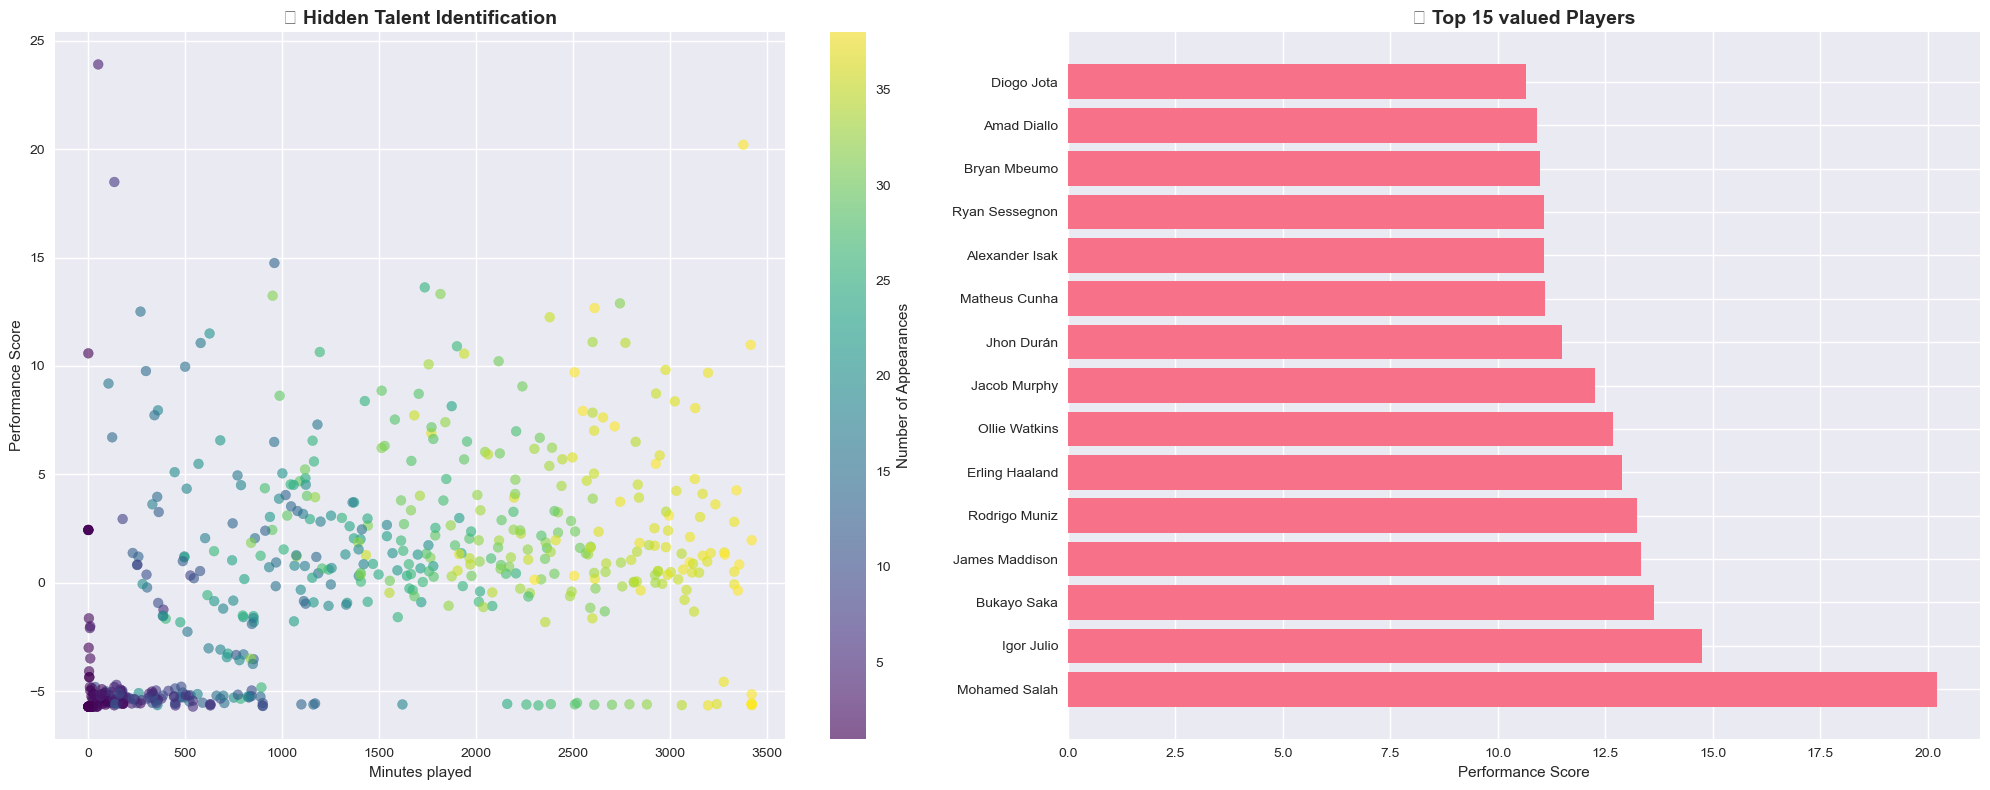

,Player Name,Club,Position,Performance_Score,Minutes,G+A_per_90,Passes%
324,Mohamed Salah,Liverpool,MID,20.199367,3377,1.252591,90
122,Igor Julio,Brighton & Hove Albion,DEF,14.749301,960,0.000000,85
1,Bukayo Saka,Arsenal,MID,13.623673,1735,0.829971,87
485,James Maddison,Tottenham Hotspur,MID,13.319230,1816,0.792952,82
238,Rodrigo Muniz,Fulham,FWD,13.237860,951,0.851735,82
335,Erling Haaland,Manchester City,FWD,12.888255,2741,0.820868,88
46,Ollie Watkins,Aston Villa,FWD,12.670028,2610,0.827586,84
399,Jacob Murphy,Newcastle United,MID,12.247575,2379,0.756620,87
36,Jhon Durán,Aston Villa,FWD,11.497418,626,1.006390,0
548,Matheus Cunha,Wolverhampton Wanderers,MID,11.102794,2600,0.726923,89


In [26]:
create_recruitment_analysis(df)

### EXECUTIVE REPORT

In [27]:
def generate_executive_report(df):
    """Generates an executive report with key tactical insights"""
    
    print("📊 EXECUTIVE REPORT - TACTICAL INSIGHTS")
    print("=" * 50)
    
    # General statistics
    total_players = len(df)
    total_clubs = df['Club'].nunique()
    total_goals = df['Goals'].sum()
    total_assists = df['Assists'].sum()
    
    print(f"🏟️  Players analyzed: {total_players}")
    print(f"🏆  Teams: {total_clubs}")
    print(f"⚽  Total goals: {total_goals}")
    print(f"🎯  Total assists: {total_assists}")
    print()
    
    # Top performers
    print("🌟 TOP PERFORMERS")
    print("-" * 20)
    top_scorer = df.loc[df['Goals'].idxmax()]
    top_assister = df.loc[df['Assists'].idxmax()]
    best_conversion = df.loc[df['Conversion %'].idxmax()]
    
    print(f"⚽  Top scorer: {top_scorer['Player Name']} ({top_scorer['Club']}) - {top_scorer['Goals']} goals")
    print(f"🎯  Top assister: {top_assister['Player Name']} ({top_assister['Club']}) - {top_assister['Assists']} assists")
    print(f"🏹  Best conversion: {best_conversion['Player Name']} ({best_conversion['Club']}) - {best_conversion['Conversion %']:.1f}%")
    print()
    
    # Tactical insights
    print("🧠 TACTICAL INSIGHTS")
    print("-" * 20)
    
    # Goals-assists correlation
    correlation_ga = df['Goals'].corr(df['Assists'])
    print(f"📈  Goals-Assists Correlation: {correlation_ga:.3f}")
    
    # Efficiency by position
    pos_efficiency = df.groupby('Position')['G+A_per_90'].mean().sort_values(ascending=False)
    print(f"🏆  Most efficient position: {pos_efficiency.index[0]} ({pos_efficiency.iloc[0]:.2f} G+A/90min)")
    
    # Most defensive team
    defensive_team = df.groupby('Club')['Defensive_per_90'].mean().sort_values(ascending=False)
    print(f"🛡️  Most defensive team: {defensive_team.index[0]} ({defensive_team.iloc[0]:.1f} actions/90min)")
    
    print("\n" + "=" * 50) 

In [28]:
generate_executive_report(df)

📊 EXECUTIVE REPORT - TACTICAL INSIGHTS
🏟️  Players analyzed: 562
🏆  Teams: 20
⚽  Total goals: 963
🎯  Total assists: 644

🌟 TOP PERFORMERS
--------------------
⚽  Top scorer: Mohamed Salah (Liverpool) - 29 goals
🎯  Top assister: Mohamed Salah (Liverpool) - 18 assists
🏹  Best conversion: Cole Palmer (Chelsea) - 50.0%

🧠 TACTICAL INSIGHTS
--------------------
📈  Goals-Assists Correlation: 0.495
🏆  Most efficient position: FWD (0.30 G+A/90min)
🛡️  Most defensive team: Wolverhampton Wanderers (9.4 actions/90min)

